<div style='background-image: url("https://i.ibb.co/2t6jDtW/igte-tu-banner.png") ; padding: 0px ; background-size: 40% 130% ; background-repeat: no-repeat; border-radius: 5px ; height: 250px'>
<div style="position: absolute; top: 100px; left: 260px; border-radius: 10px; background: rgba(212, 212, 212, 0.6) ; width:600px; height: 150px">
<div style="position: relative; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; padding-top: 5px; padding-left: 130px ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">Optimization I : HW-2</div>
            <div style="font-size: large ; padding-top: 20px ; padding-left: 135px ; color: rgba(0 , 0 , 0 , 0.6)">First and second order methods</div>
            <div style="font-size: small ; padding-top: 5px ; padding-left: 25px ; color: rgba(0 , 0 , 0 , 0.4)">05.12.2023 </div>
                    <div style="font-size: small ; padding-top: 0px ; padding-left: 25px ; color: rgba(0 , 0 , 0 , 0.4)">Group Nr. 05, Haris Felic ( 01609136 ), Benedikt Gasplmayr ( 01530104 ) </div>
        </div>
    </div>
</div>

In [1]:
from typing import Callable, List, Tuple
import numpy as np
from numpy.linalg import norm


import matplotlib.pyplot as plt
import test_functions as tf

from HW2_GROUP5 import gradient_descent
from HW2_GROUP5 import newton
from HW2_GROUP5 import levenberg_marquardt
from HW2_GROUP5 import gauss_newton

## Task 1 ( Gradient descent ) :

Within the algorithm category of the first excercise (derivative-free method), only the knowledge of the function value is required, and it is systematically compared to alternative solutions through iterations. In addition to Bracketing and Sectioning (specifically for 1D problems), there exist alternative strategies within the realm of zero-order or derivative-free methods. In this excercise, it is required to implement derivative-based methods, necessitating the computation of the gradient and, for second-order methods, the Hessian matrix as well.



The simplest and most intuitive way to find a descent direction is calculating the steepest descent, 
i.e. the negative gradient of the function at the current point $\mathbf{x}$: 
$\mathbf{d}(\mathbf{x}) = -\mathbf{g}(\mathbf{x})$

with $\mathbf{x} = [x_1, x_2, \ldots, x_n]^T$ and $\nabla f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial}{\partial x_1}(\mathbf{x}) \\
\frac{\partial}{\partial x_2}(\mathbf{x}) \\
\vdots \\
\frac{\partial}{\partial x_n}(\mathbf{x}) \\
\end{bmatrix} = \mathbf{g}(\mathbf{x})$

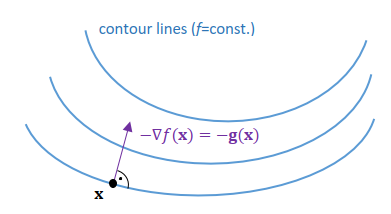

The steepest descent values can be very large, and it happens easily that the algorithm jumps over 
the optimum along the search direction. Thus, the step length must be controlled somehow, which 
can be done by using a line search algorithm. Finally, the steepest descent method works as follows: 

* Start with a point $\mathbf{x}^{(k)}$
* Calculate the search direction (negative gradient in the current point): $\mathbf{d}^{(k)} = -\mathbf{g}^{(k)}$
* Apply a line search on the subproblem: $\min_{\alpha} f(\mathbf{x}^{(k)} + \alpha \mathbf{d}^{(k)})$
* Check if the optimality condition is fulfilled: $\mathbf{g}^{(k)} = \mathbf{0}$
* Set the new point: $\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \alpha \mathbf{d}^{(k)}$







In this task, the gradient descent method is used to find the optimum starting from the initial guess of $\mathbf{x_0 = [0.75,-1.25]^T}$ for the Rosenbruck function. The results are illustrated below; the optimum point is found at $\mathbf{x = [0.99891407, 0.99782542]^T}$ with 11,868 function calls and 1,979 iterations. In addition, the results of the gradient descent method is shown in the figure; the starting point is illustrated in green and the solution in red. 


Start gradient descent
Starting point at x = [[ 0.75]
 [-1.25]]
Optimum at x = [[0.99891407]
 [0.99782542]]
function calls: 11868
iterations: 1979


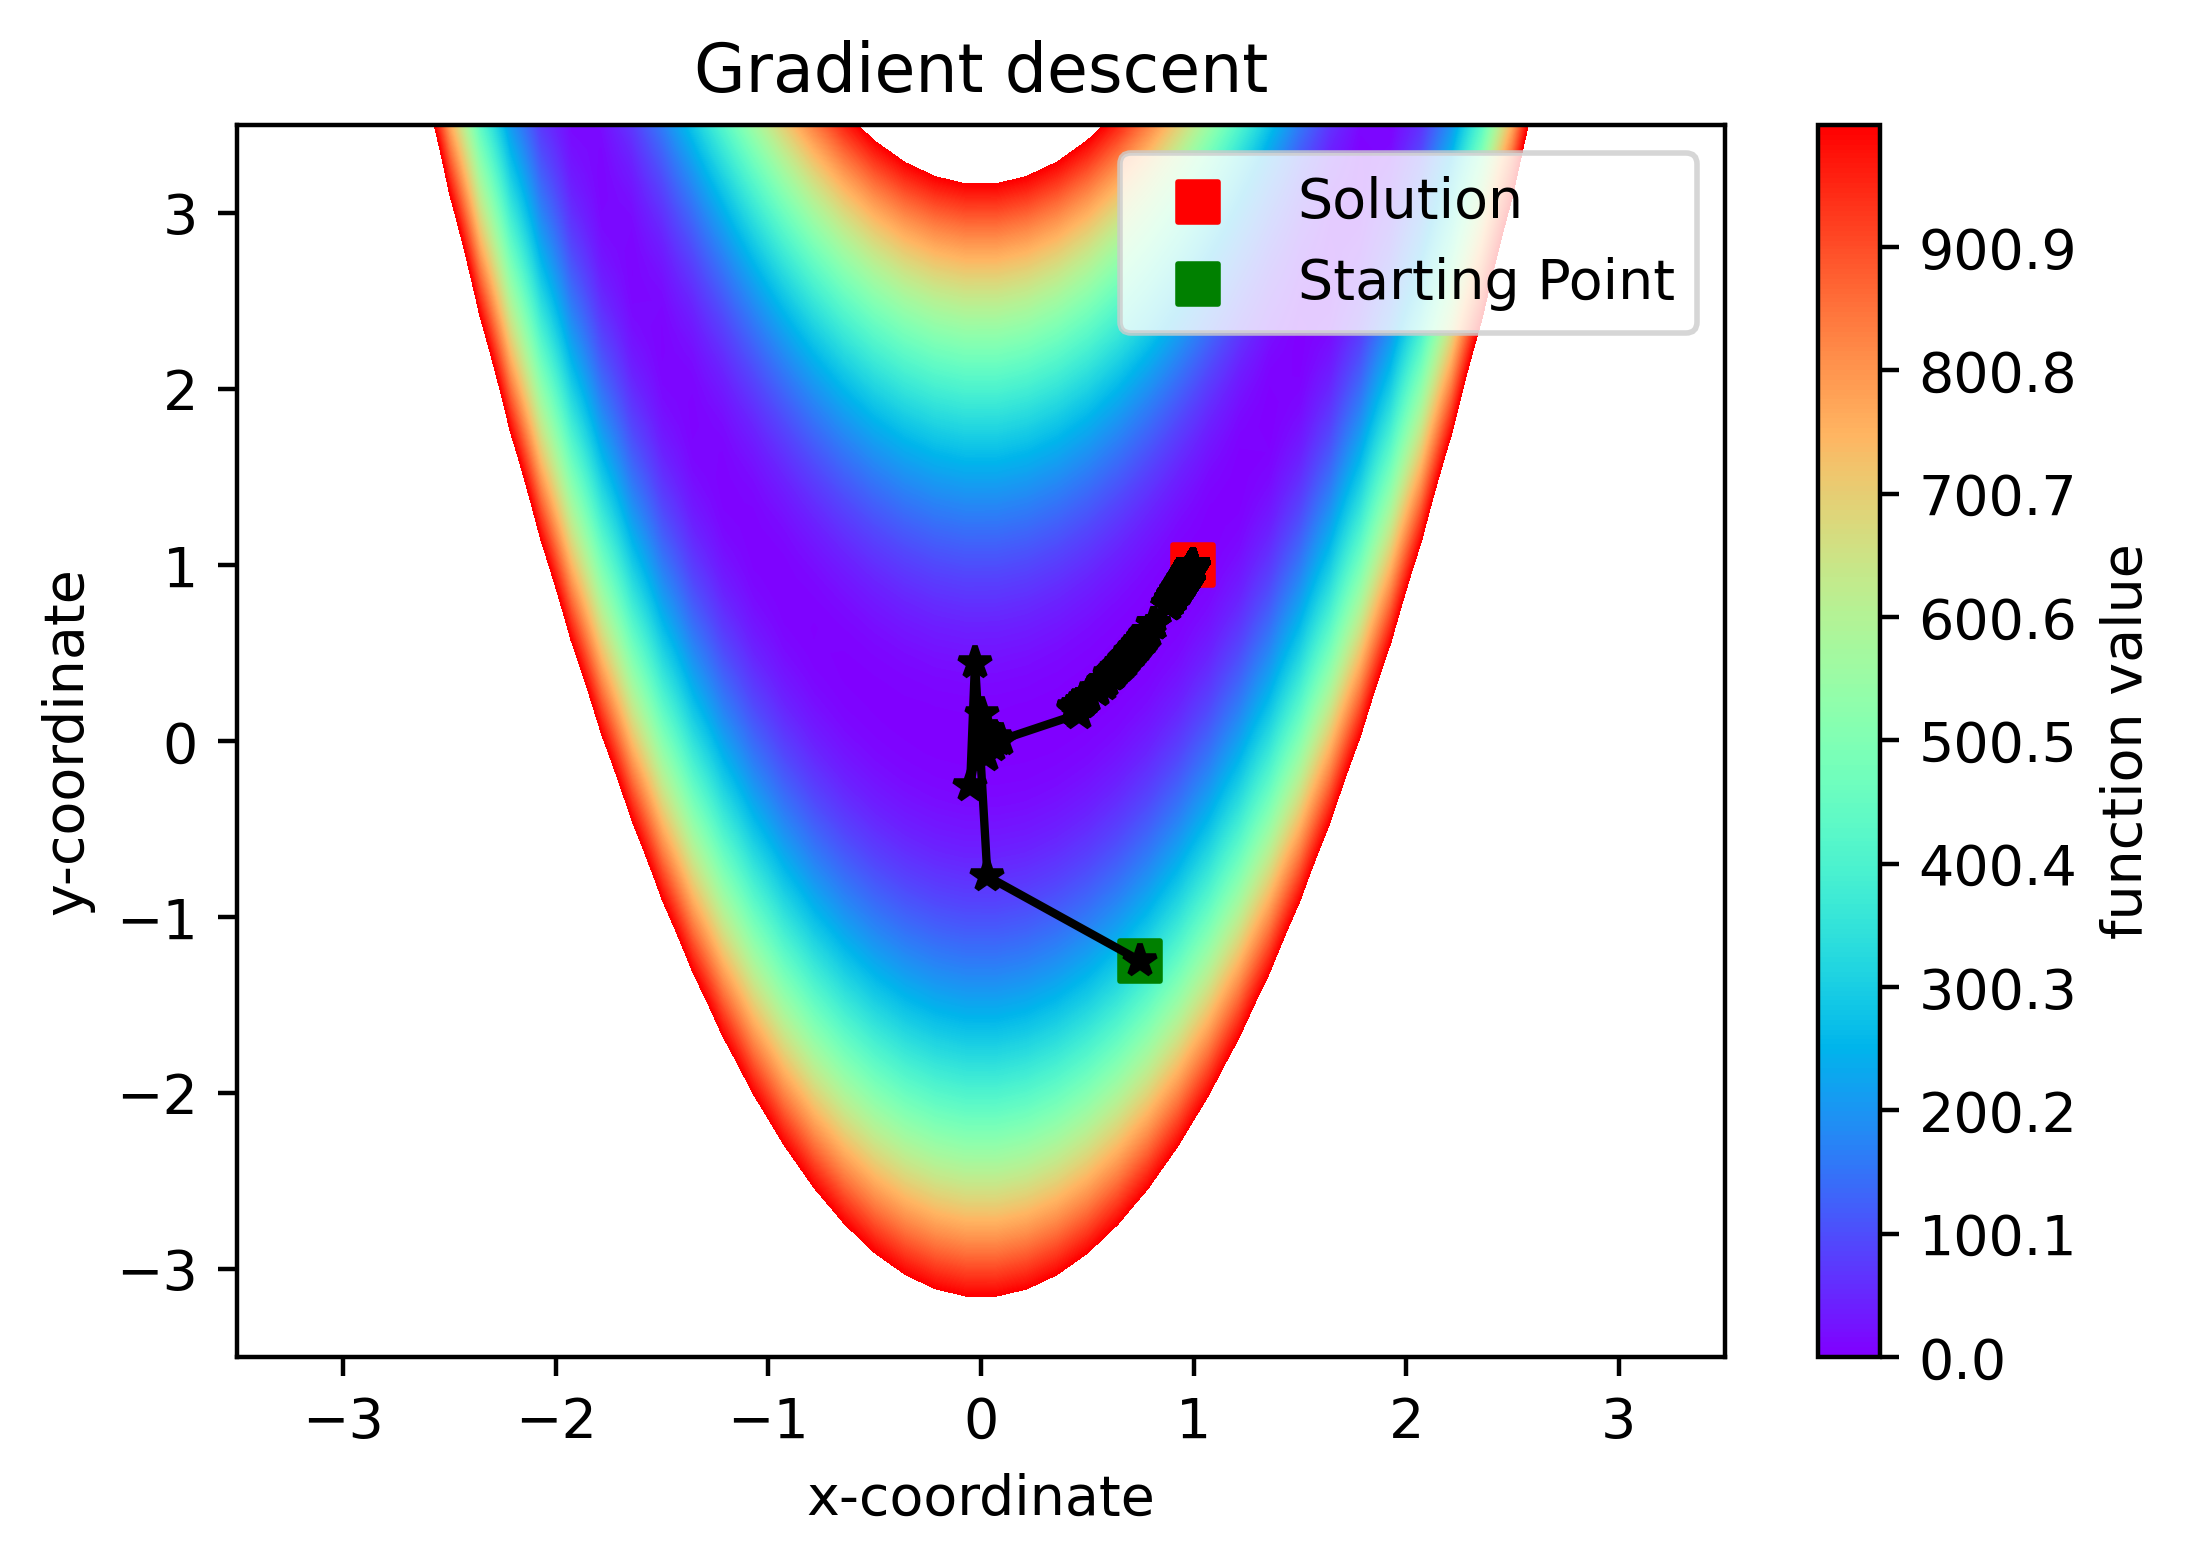

In [2]:
############ CONTROL FUNCTIONS ################ 
print('Start gradient descent')
f,g = tf.test_function(1)[:2]

x0 = np.array([[-2, 0]])
x0 = np.array([[0.75, -1.25]]).T

x_opt, x_steps, fc, gc = gradient_descent(f=f, g=g, x0=x0,eps = 1e-3, s =2e-4, k = 3)

#################### Plot the data
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
x = np.linspace(-3.5,3.5,50)
xx, yy = np.meshgrid(x,x)
zz = f(np.column_stack((xx.flatten(), yy.flatten())))
cf = ax.contourf(xx, yy, zz.reshape(xx.shape), levels=np.linspace(0, 1000, 1000), cmap="rainbow")
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
plt.colorbar(cf, label="function value")
plt.title('Gradient descent')

# Plot the search direction
combined_array = np.concatenate(x_steps, axis=0)
ax.plot(combined_array[:, 0], combined_array[:, 1], 'k*-', )

ax.scatter(x_opt[0], x_opt[1].T,marker="s",label="Solution",s=50,color='red')
ax.scatter(x0[0].T, x0[1].T,marker="s",label="Starting Point",s=50,color='green')
plt.legend()

print("Starting point at x =", x0)
print("Optimum at x =", x_opt)
print("function calls:",fc)
print("iterations:",gc)

## Task 2 ( Newton method ) :

Considering the second derivative of the function is instrumental in determining a suitable step length. This involves employing a quadratic approximation of the objective function.

Second-order Taylor expansion of the function, where $\mathbf{p}$ is the Newton step that has to be found:
$f(\mathbf{x}^{(k)} + \mathbf{p}) \approx f(\mathbf{x}^{(k)}) + (\mathbf{g}^{(k)})^T \mathbf{p} + \frac{1}{2} \mathbf{p}^T G^{(k)} \mathbf{p}$

with the Hessian 
$ G (\mathbf{x}) =
\begin{bmatrix}
\frac{\partial^2}{\partial x_1^2}(\mathbf{x}) & \frac{\partial^2}{\partial x_1 \partial x_2}(\mathbf{x}) & \cdots & \frac{\partial^2}{\partial x_1 \partial x_n}(\mathbf{x}) \\
\frac{\partial^2}{\partial x_2 \partial x_1}(\mathbf{x}) & \frac{\partial^2}{\partial x_2^2}(\mathbf{x}) & \cdots & \frac{\partial^2}{\partial x_2 \partial x_n}(\mathbf{x}) \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2}{\partial x_n \partial x_1}(\mathbf{x}) & \frac{\partial^2}{\partial x_n \partial x_2}(\mathbf{x}) & \cdots & \frac{\partial^2}{\partial x_n^2}(\mathbf{x}) \\
\end{bmatrix}
$

After differentiating $f(\mathbf{x}^{(k)} + \mathbf{p})$ with respect to $\mathbf{p}$ and setting it to $\mathbf{0}$, we get




$G^{(k)} \mathbf{p} = -\mathbf{g}^{(k)}$



and finally, the Newton step:
$ \mathbf{p} = -\left(G^{(k)}\right)^{-1} \mathbf{g}^{(k)} $




The new point is directly set by:
$ \mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \mathbf{p} $






The algorithm stops if the first and the second-order optimality conditions are fulfilled:
- 1st order: $\mathbf{g}^{(k)} = \mathbf{0}$
- 2nd order: $G^{(k)}$ is positive definite




In this task, the newton method is used to find the optimum starting from the initial guess of $\mathbf{x_0 = [0.75,-1.25]^T}$ for the Rosenbruck function (similar as for the gradient descent). The results are illustrated below; the optimum point is found at $\mathbf{x = [0.99997817, 0.99995635]^T}$ with 4 iterations. Compared to the gradient descent, the iteration numbers have dramitcally decresed (from 1,979 to 4). In addition, the results of the newton method is shown in the figure; the starting point is illustrated in green and the solution in red. However, with this method, the Hessian matrix needs to be positiv definite, otherwise the algorithm may not converge. 



Start newton method
Eigenvalues: [1261.76455498  115.23544502]
Convergence reached!
Starting point at x = [[ 0.75]
 [-1.25]]
Optimum at x = [[0.99997817]
 [0.99995635]]
iterations: 4


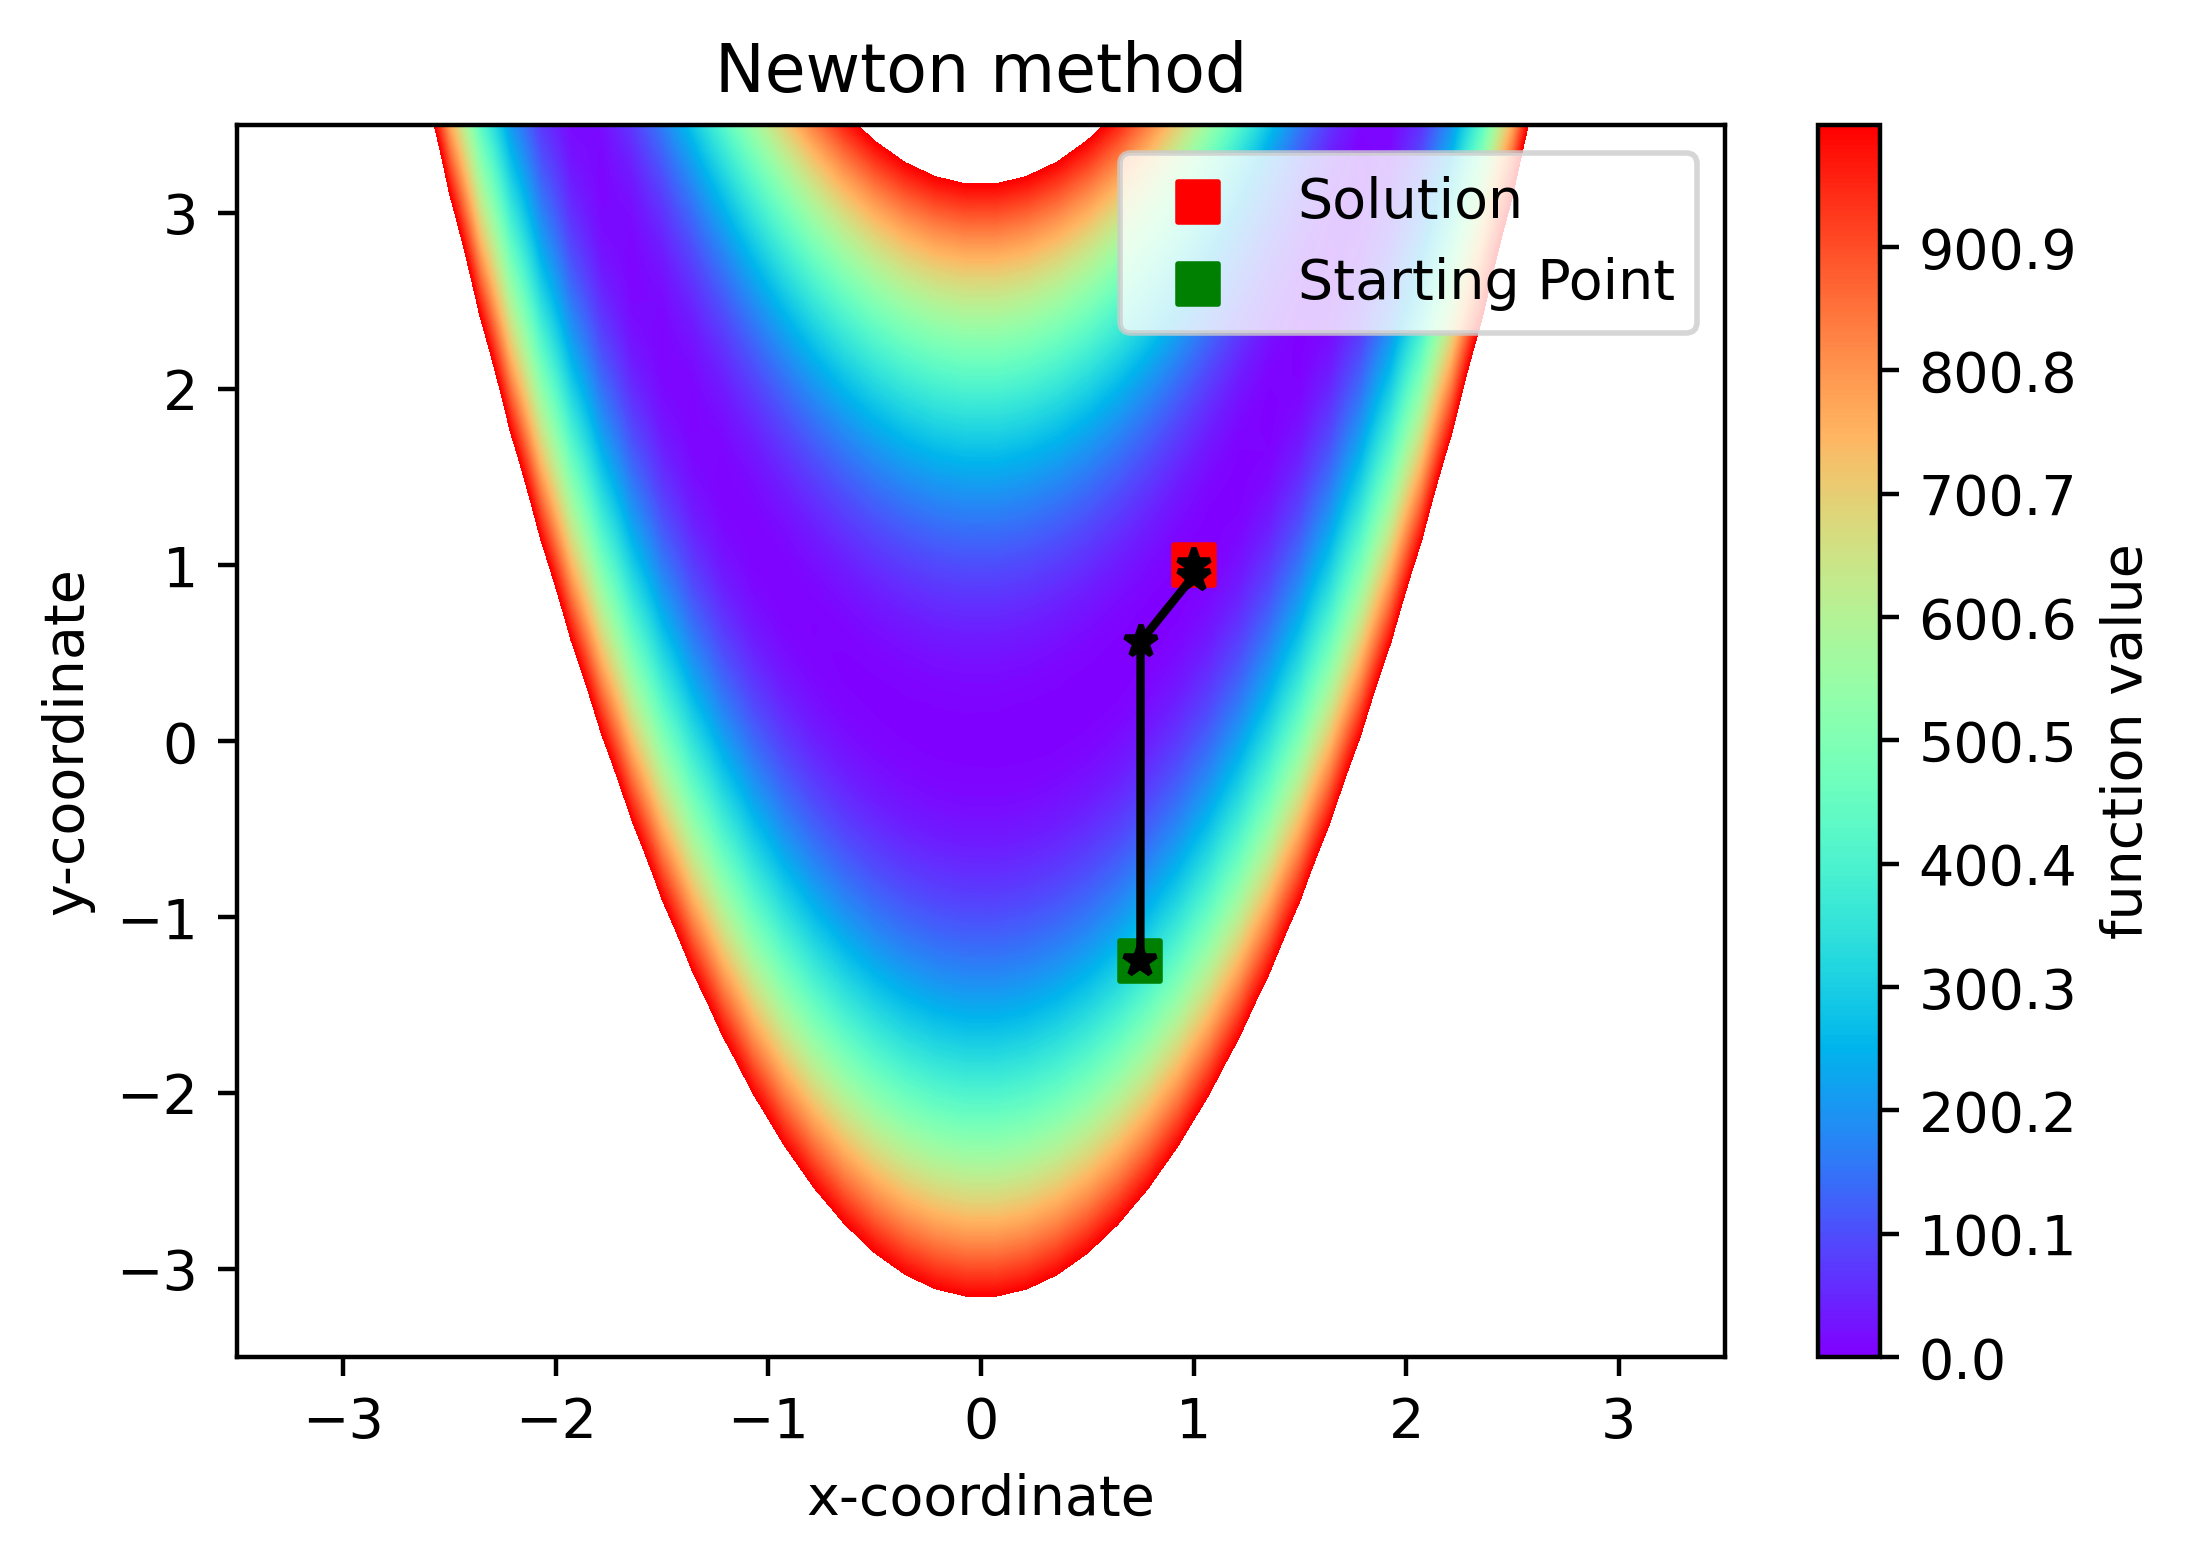

In [3]:
print('\nStart newton method')
f,g,H = tf.test_function(1)[:3]

x0 = np.array([[0.75, -1.25]]).T

print(f'Eigenvalues: {np.linalg.eigvals(H(x0))}')
x_opt, x_steps, gc = newton(g, H, x0)


#################### Plot the data
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
x = np.linspace(-3.5,3.5,50)
xx, yy = np.meshgrid(x,x)
zz = f(np.column_stack((xx.flatten(), yy.flatten())))
cf = ax.contourf(xx, yy, zz.reshape(xx.shape), levels=np.linspace(0, 1000, 1000), cmap="rainbow")
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
plt.colorbar(cf, label="function value")
plt.title('Newton method')


# Plot the search direction
combined_array = np.concatenate(x_steps, axis=0)
ax.plot(combined_array[:, 0], combined_array[:, 1], 'k*-', )

ax.scatter(x_opt[0], x_opt[1].T,marker="s",label="Solution",s=50,color='red')
ax.scatter(x0[0].T, x0[1].T,marker="s",label="Starting Point",s=50,color='green')

plt.legend()

print("Starting point at x =", x0)
print("Optimum at x =", x_opt)
print("iterations:",gc)


In this task, the newton method is used to find the optimum starting from the initial guess of $\mathbf{x_0 = [0.0,0.0]^T}$ for the Himmelblau function. The results are illustrated below; the optimum point is found at $\mathbf{x = [-0.27084639, -0.92302828]^T}$ with 4 iterations. Compared to the resuls before, the iteration remained the same. However, the hessian matrix is now infinite (since the eigenvalues are both negativ for the 2x2 hessian matrix); thus, the newton method is less suitable to find minimum points. In the figure, the results are illustrated in the same way as before. Herein, the solution of the newton method indicate a minimum point but it is not a global minimum by investigating the whole domain. 

Eigenvalues: [-42. -26.]
Convergence reached!
Starting point at x = [[0]
 [0]]
Optimum at x = [[-0.27084639]
 [-0.92302828]]
iterations: 4


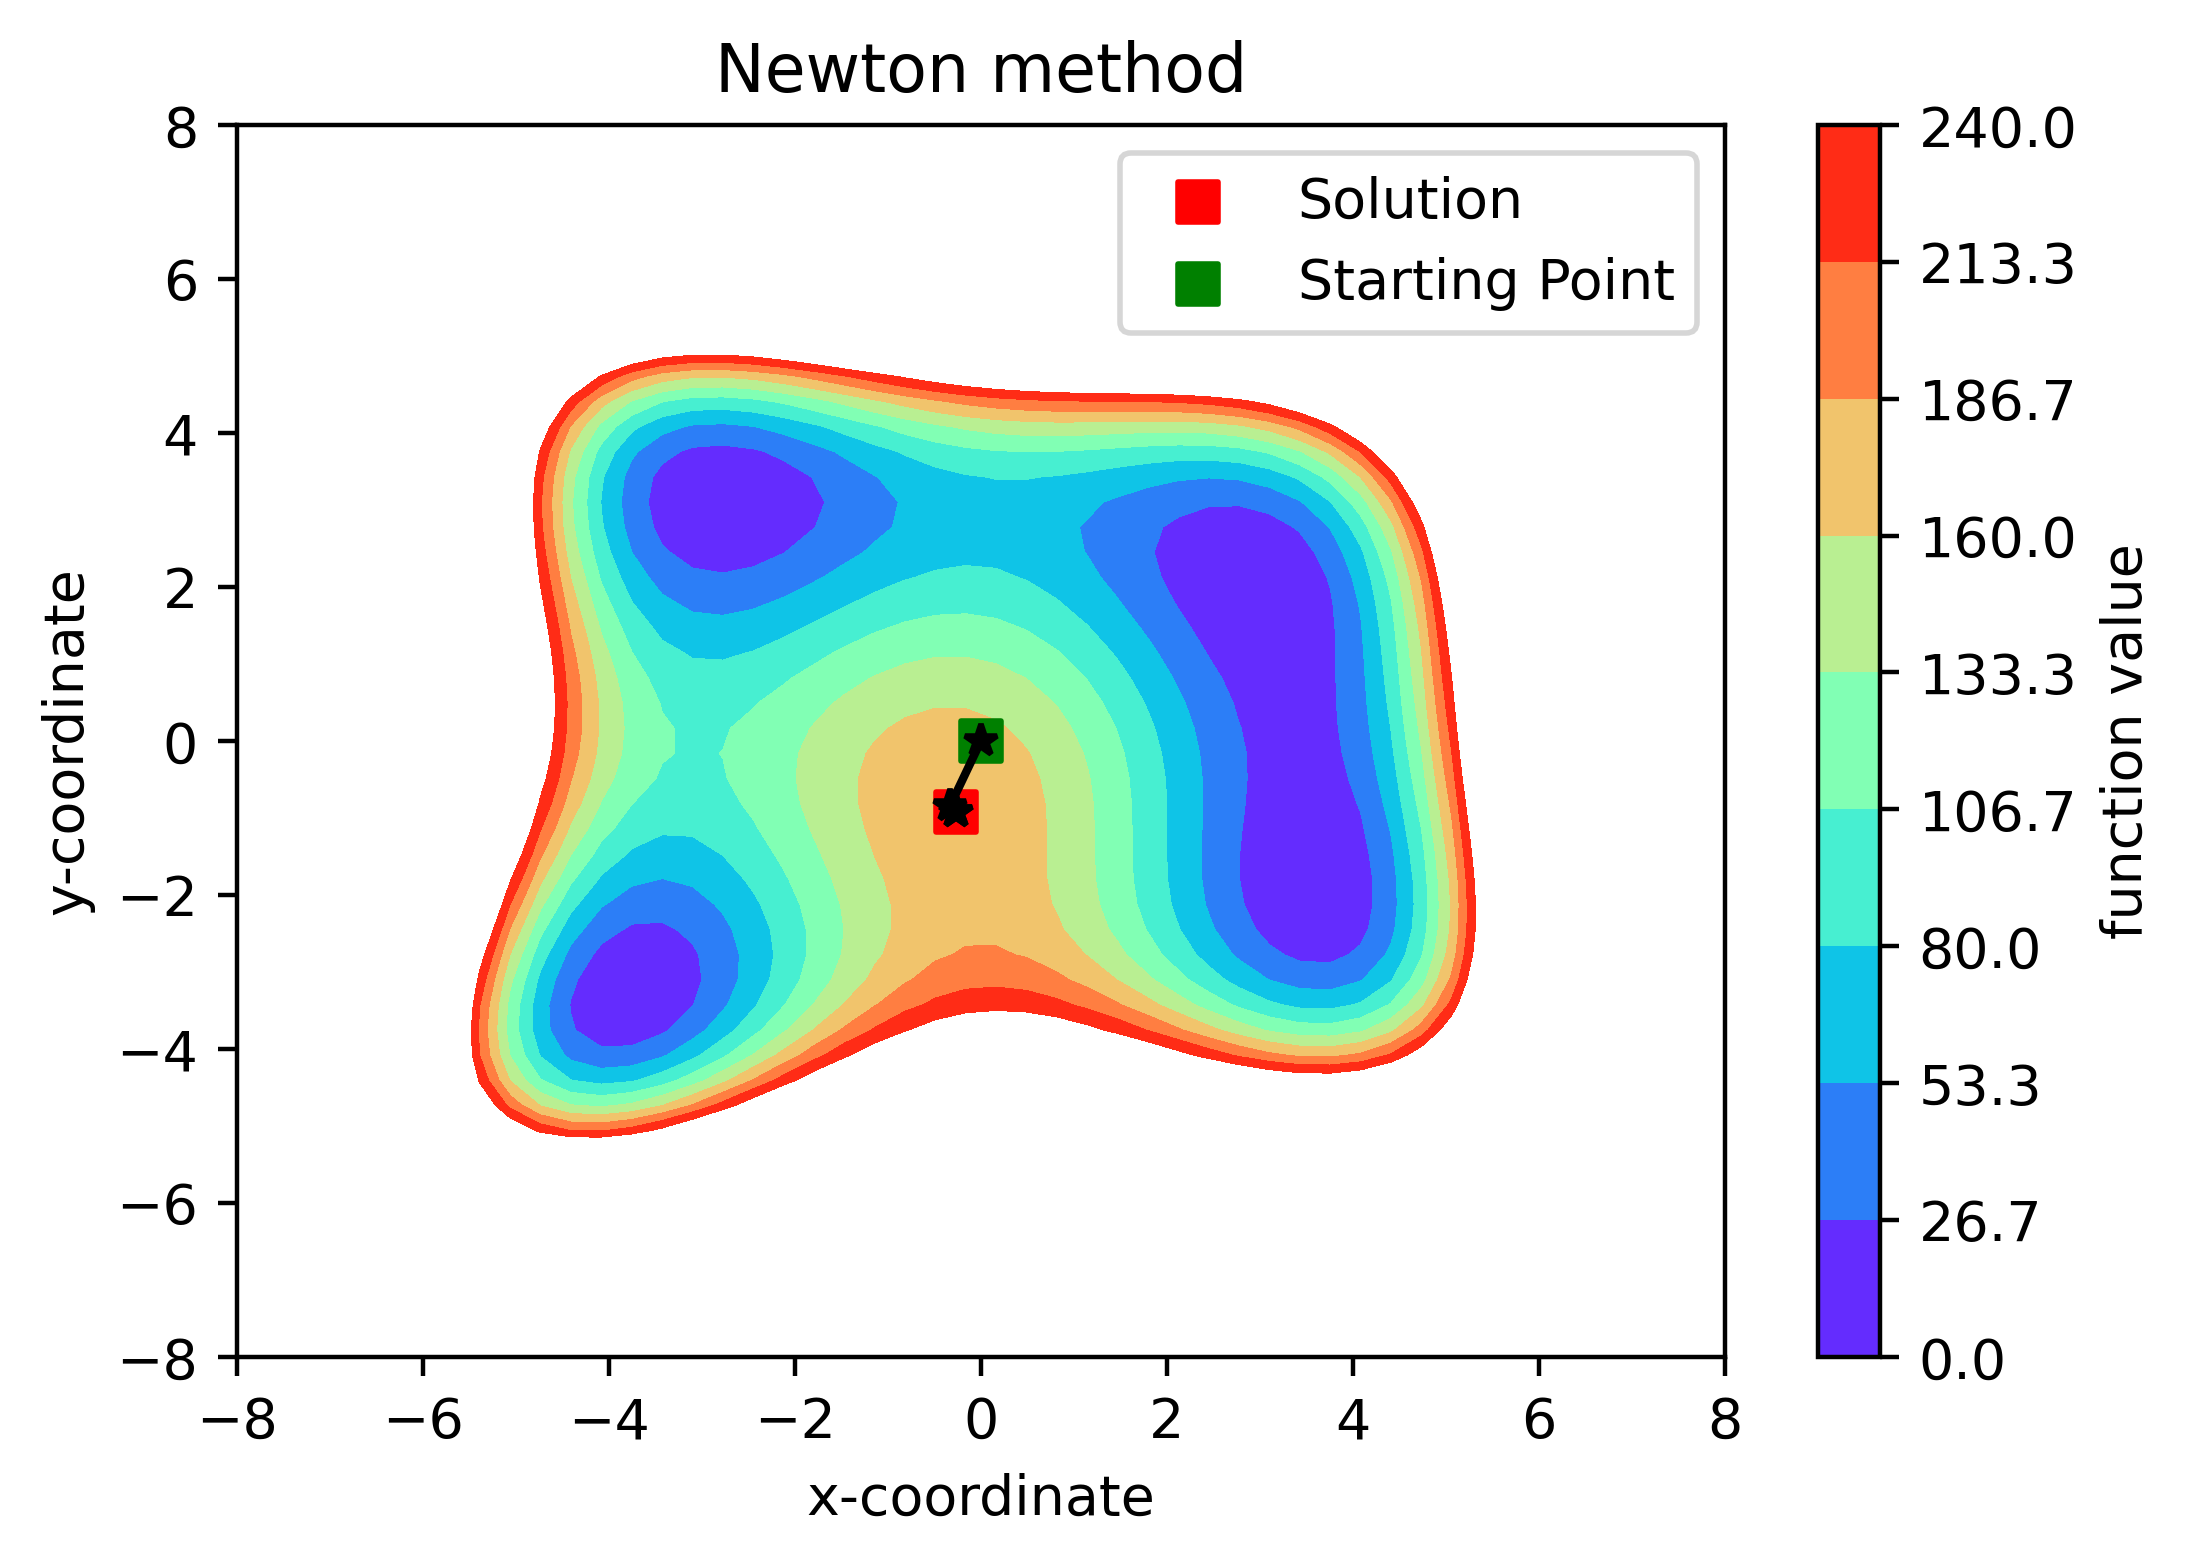

In [4]:
f,g,H = tf.test_function(2)[:3]
x0 = np.array([[0, 0]]).T

print(f'Eigenvalues: {np.linalg.eigvals(H(x0))}')
x_opt, x_steps, gc = newton(g, H, x0)


#################### Plot the data
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
x = np.linspace(-8,8,50)
xx, yy = np.meshgrid(x,x)
zz = f(np.column_stack((xx.flatten(), yy.flatten())))
#cf = ax.contourf(xx, yy, zz.reshape(xx.shape), levels=np.linspace(0, 24750, 10), cmap="rainbow")
cf = ax.contourf(xx, yy, zz.reshape(xx.shape), levels=np.linspace(0, 240, 10), cmap="rainbow")
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
plt.colorbar(cf, label="function value")
plt.title('Newton method')



combined_array = np.concatenate(x_steps, axis=0)

# Plot the search direction
ax.plot(combined_array[:, 0], combined_array[:, 1], 'k*-', )

ax.scatter(x_opt[0], x_opt[1].T,marker="s",label="Solution",s=50,color='red')
ax.scatter(x0[0].T, x0[1].T,marker="s",label="Starting Point",s=50,color='green')

plt.legend()

print("Starting point at x =", x0)
print("Optimum at x =", x_opt)
print("iterations:",gc)


## Task 3 ( Levenberg-Marquardt method ) :

If the Hessian matrix lacks positive definiteness (meaning not all eigenvalues are greater than 0), the Newton method may not converge. In such instances, matrix stability can be achieved by augmenting it with the identity matrix I. When the Hessian is in proximity to positive definiteness, a slight adjustment is adequate. To achieve this, a factor 𝜈 is introduced to weigh the identity matrix. Consequently, the step in the Levenberg-Marquardt method transforms to:


$ (G(\mathbf{k}) + \nu \mathbf{I}) \mathbf{p} = -\mathbf{g}^{(\mathbf{k})} $




The most straightforward approach to determining a suitable 𝜈 is to initiate it with a small value and incrementally raise it by a certain factor until the Hessian, augmented by the bias, becomes positive definite.


In this task, the Levenberg-Marquardt method is used to find the optimum starting from the initial guess of $\mathbf{x_0 = [0.0,0.0]^T}$ for the Himmelblau function. The results are illustrated below; the optimum point is found at $\mathbf{x = [3.58442834, -1.84812653]^T}$ with 10 iterations. Compared to the newton method, the iteration numbers have increased (from 4 to 10) and the Levenberg-Marquardt method has found a global minimum with the illustrated domain in the figure below. This is due to the updated Hessian matrix which is now positive definite. 
 


Start Levenberg marquardt method
Eigenvalues: [-42. -26.]
Starting point at x = [[0]
 [0]]
Optimum at x = [[ 3.58442834]
 [-1.84812653]]
iterations: 10


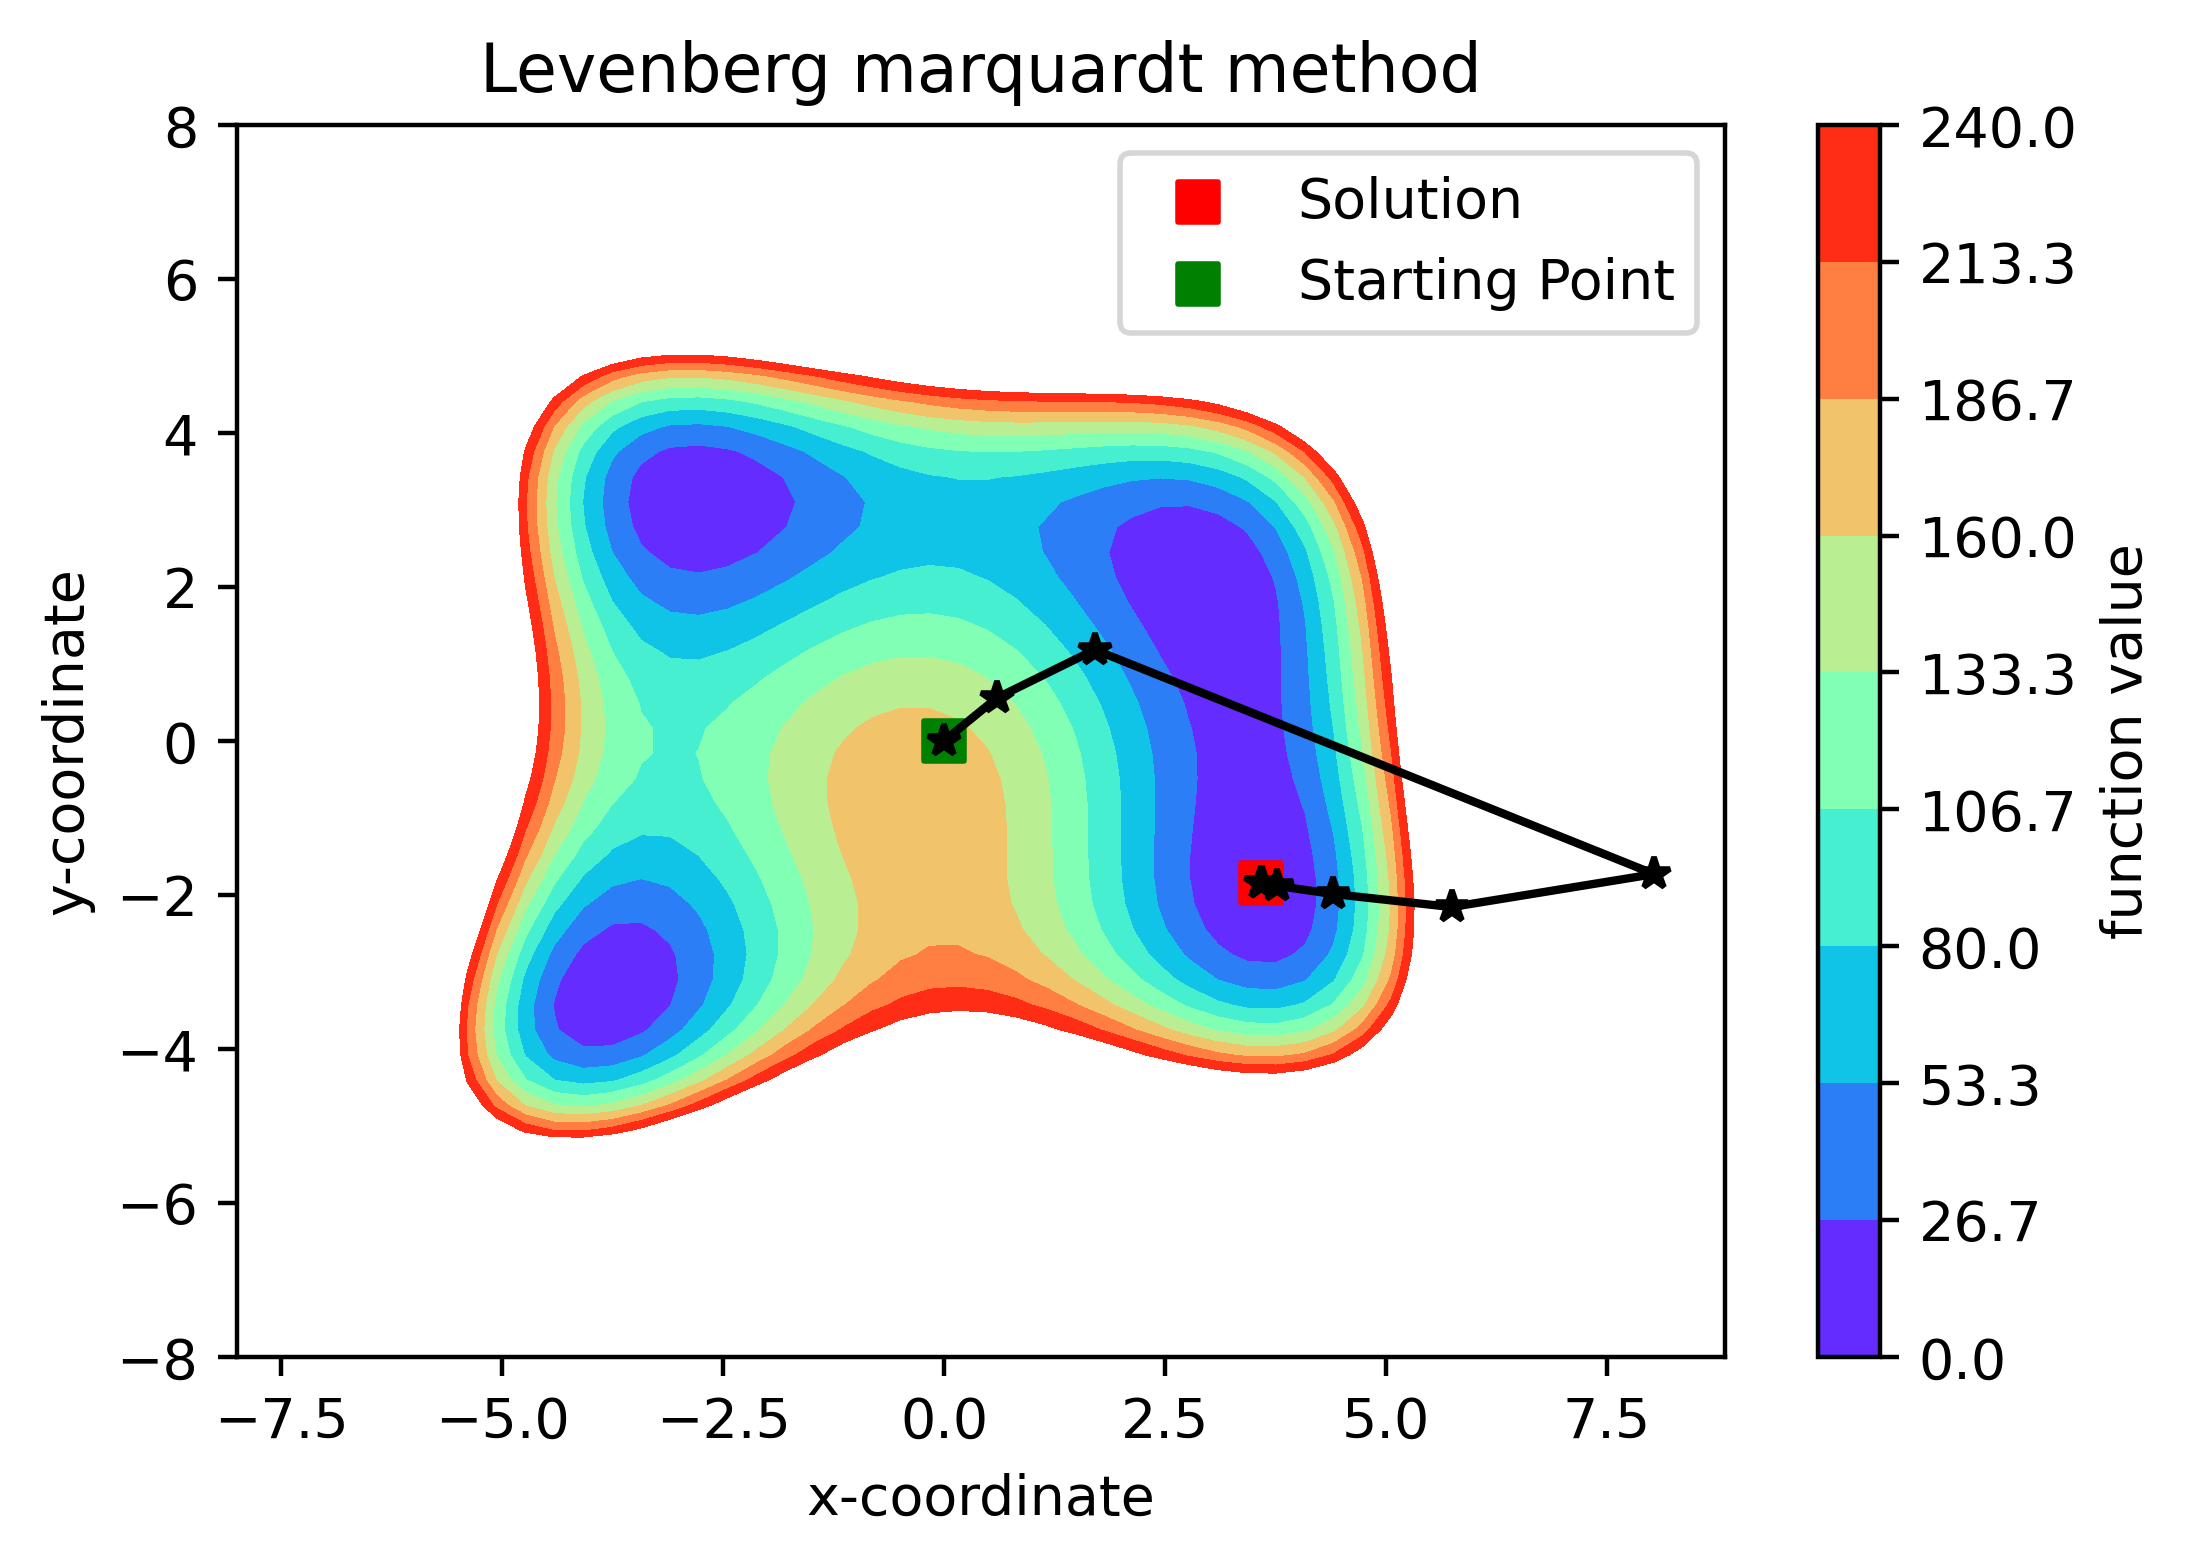

In [5]:
print('\nStart Levenberg marquardt method')
f,g,H = tf.test_function(2)[:3]

x0 = np.array([[0, 0]]).T

print(f'Eigenvalues: {np.linalg.eigvals(H(x0))}')
x_opt, x_steps, gc = levenberg_marquardt(g, H, x0)


#################### Plot the data
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
x = np.linspace(-8,8,50)
xx, yy = np.meshgrid(x,x)
zz = f(np.column_stack((xx.flatten(), yy.flatten())))
#cf = ax.contourf(xx, yy, zz.reshape(xx.shape), levels=np.linspace(0, 24750, 10), cmap="rainbow")
cf = ax.contourf(xx, yy, zz.reshape(xx.shape), levels=np.linspace(0, 240, 10), cmap="rainbow")
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
plt.colorbar(cf, label="function value")
plt.title('Levenberg marquardt method')


# Plot the search direction
combined_array = np.concatenate(x_steps, axis=0)
ax.plot(combined_array[:, 0], combined_array[:, 1], 'k*-', )

ax.scatter(x_opt[0], x_opt[1].T,marker="s",label="Solution",s=50,color='red')
ax.scatter(x0[0].T, x0[1].T,marker="s",label="Starting Point",s=50,color='green')

plt.legend()

print("Starting point at x =", x0)
print("Optimum at x =", x_opt)
print("iterations:",gc)

## Task 4 ( Gauss-Newton method ) :


This method is employed for a specialized category of non-linear least squares problems, such as data fitting and non-linear regression.

In this scenario, the objective function is the sum of the squared residuals $\mathbf{r}$ between the data $\mathbf{y}$ (a vector of length $m$, representing the number of data points) to be fit and the function value $\mathbf{F}(\mathbf{x})$ at the current point $\mathbf{x}$:

$ \mathbf{r}(\mathbf{x}) = \mathbf{F}(\mathbf{x}) - \mathbf{y}$

$ f(\mathbf{x}) = \sum_{i=1}^{m} r_i(\mathbf{x})^2 = \mathbf{r}^T \mathbf{r} $


The gradient of $f(\mathbf{x})$ can be expressed as:

$ \mathbf{g}(\mathbf{x}) = \nabla \mathbf{r}^T \mathbf{r} = \ldots = 2 \nabla \mathbf{r}^T \mathbf{r} = 2\mathbf{J}^T(\mathbf{x}) \mathbf{r}(\mathbf{x}) $

with the Jacobian matrix

$J(\mathbf{x}) = \begin{bmatrix}
\frac{\partial \mathbf{r}_1}{\partial x_1} & \frac{\partial \mathbf{r}_1}{\partial x_2} & \ldots & \frac{\partial \mathbf{r}_1}{\partial x_n} \\
\frac{\partial \mathbf{r}_2}{\partial x_1} & \frac{\partial \mathbf{r}_2}{\partial x_2} & \ldots & \frac{\partial \mathbf{r}_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial \mathbf{r}_m}{\partial x_1} & \frac{\partial \mathbf{r}_m}{\partial x_2} & \ldots & \frac{\partial \mathbf{r}_m}{\partial x_n} \\
\end{bmatrix} $

The Hessian can be approximated by neglecting the final term involving the residuals, as they become very small in the least squares minimization:

$G(\mathbf{x}) = \ldots = 2 \mathbf{J}^T \mathbf{J}$ 

Finally, the Newton step changes to:

$\mathbf{p} = -\left[G(\mathbf{k})\right]^{-1} \mathbf{g}^{(\mathbf{k})} = -\left[\mathbf{J}(\mathbf{k})^T \mathbf{J}(\mathbf{k})\right]^{-1} \mathbf{J}(\mathbf{k})^T \mathbf{r}(\mathbf{k}) $

It can be observed that only first-order derivatives are necessary in the Gauss-Newton method.



In this task, the gauss newton method is used to find the optimum starting from the initial guess of $\mathbf{x_0 = [0.5,0.2,0.3]^T}$ to fit the resonance curve of a series reson. The results are illustrated below; the optimum point is found at $\mathbf{x = [100.0, 1.0, 5.0]^T}$ with 8 iterations. In the figure, fitted model is illustrated in the gray line alongside with each iteration in different colors and the measurements in blue scatter points. As it is apparent, the results of the gauss newton method are in a good agreement with the measurements.


In the implementation of the Gauss-Newton method to calculate the Jacobian matrix, a numerical gradient method was utilized. As a validation step, the analytical Jacobian matrix should be computed and compared to the numerical Jacobian matrix to quantify the error between the two. In our case, it was not possible to derive the analytical jacobian matrix, due to convergence issues in the algorithm

Convergence reached!
Starting point at x = [[5.e-01]
 [2.e-03]
 [3.e-06]]
Optimum at x = [[1.e+02]
 [1.e-03]
 [5.e-06]]
Forward function calls: 32


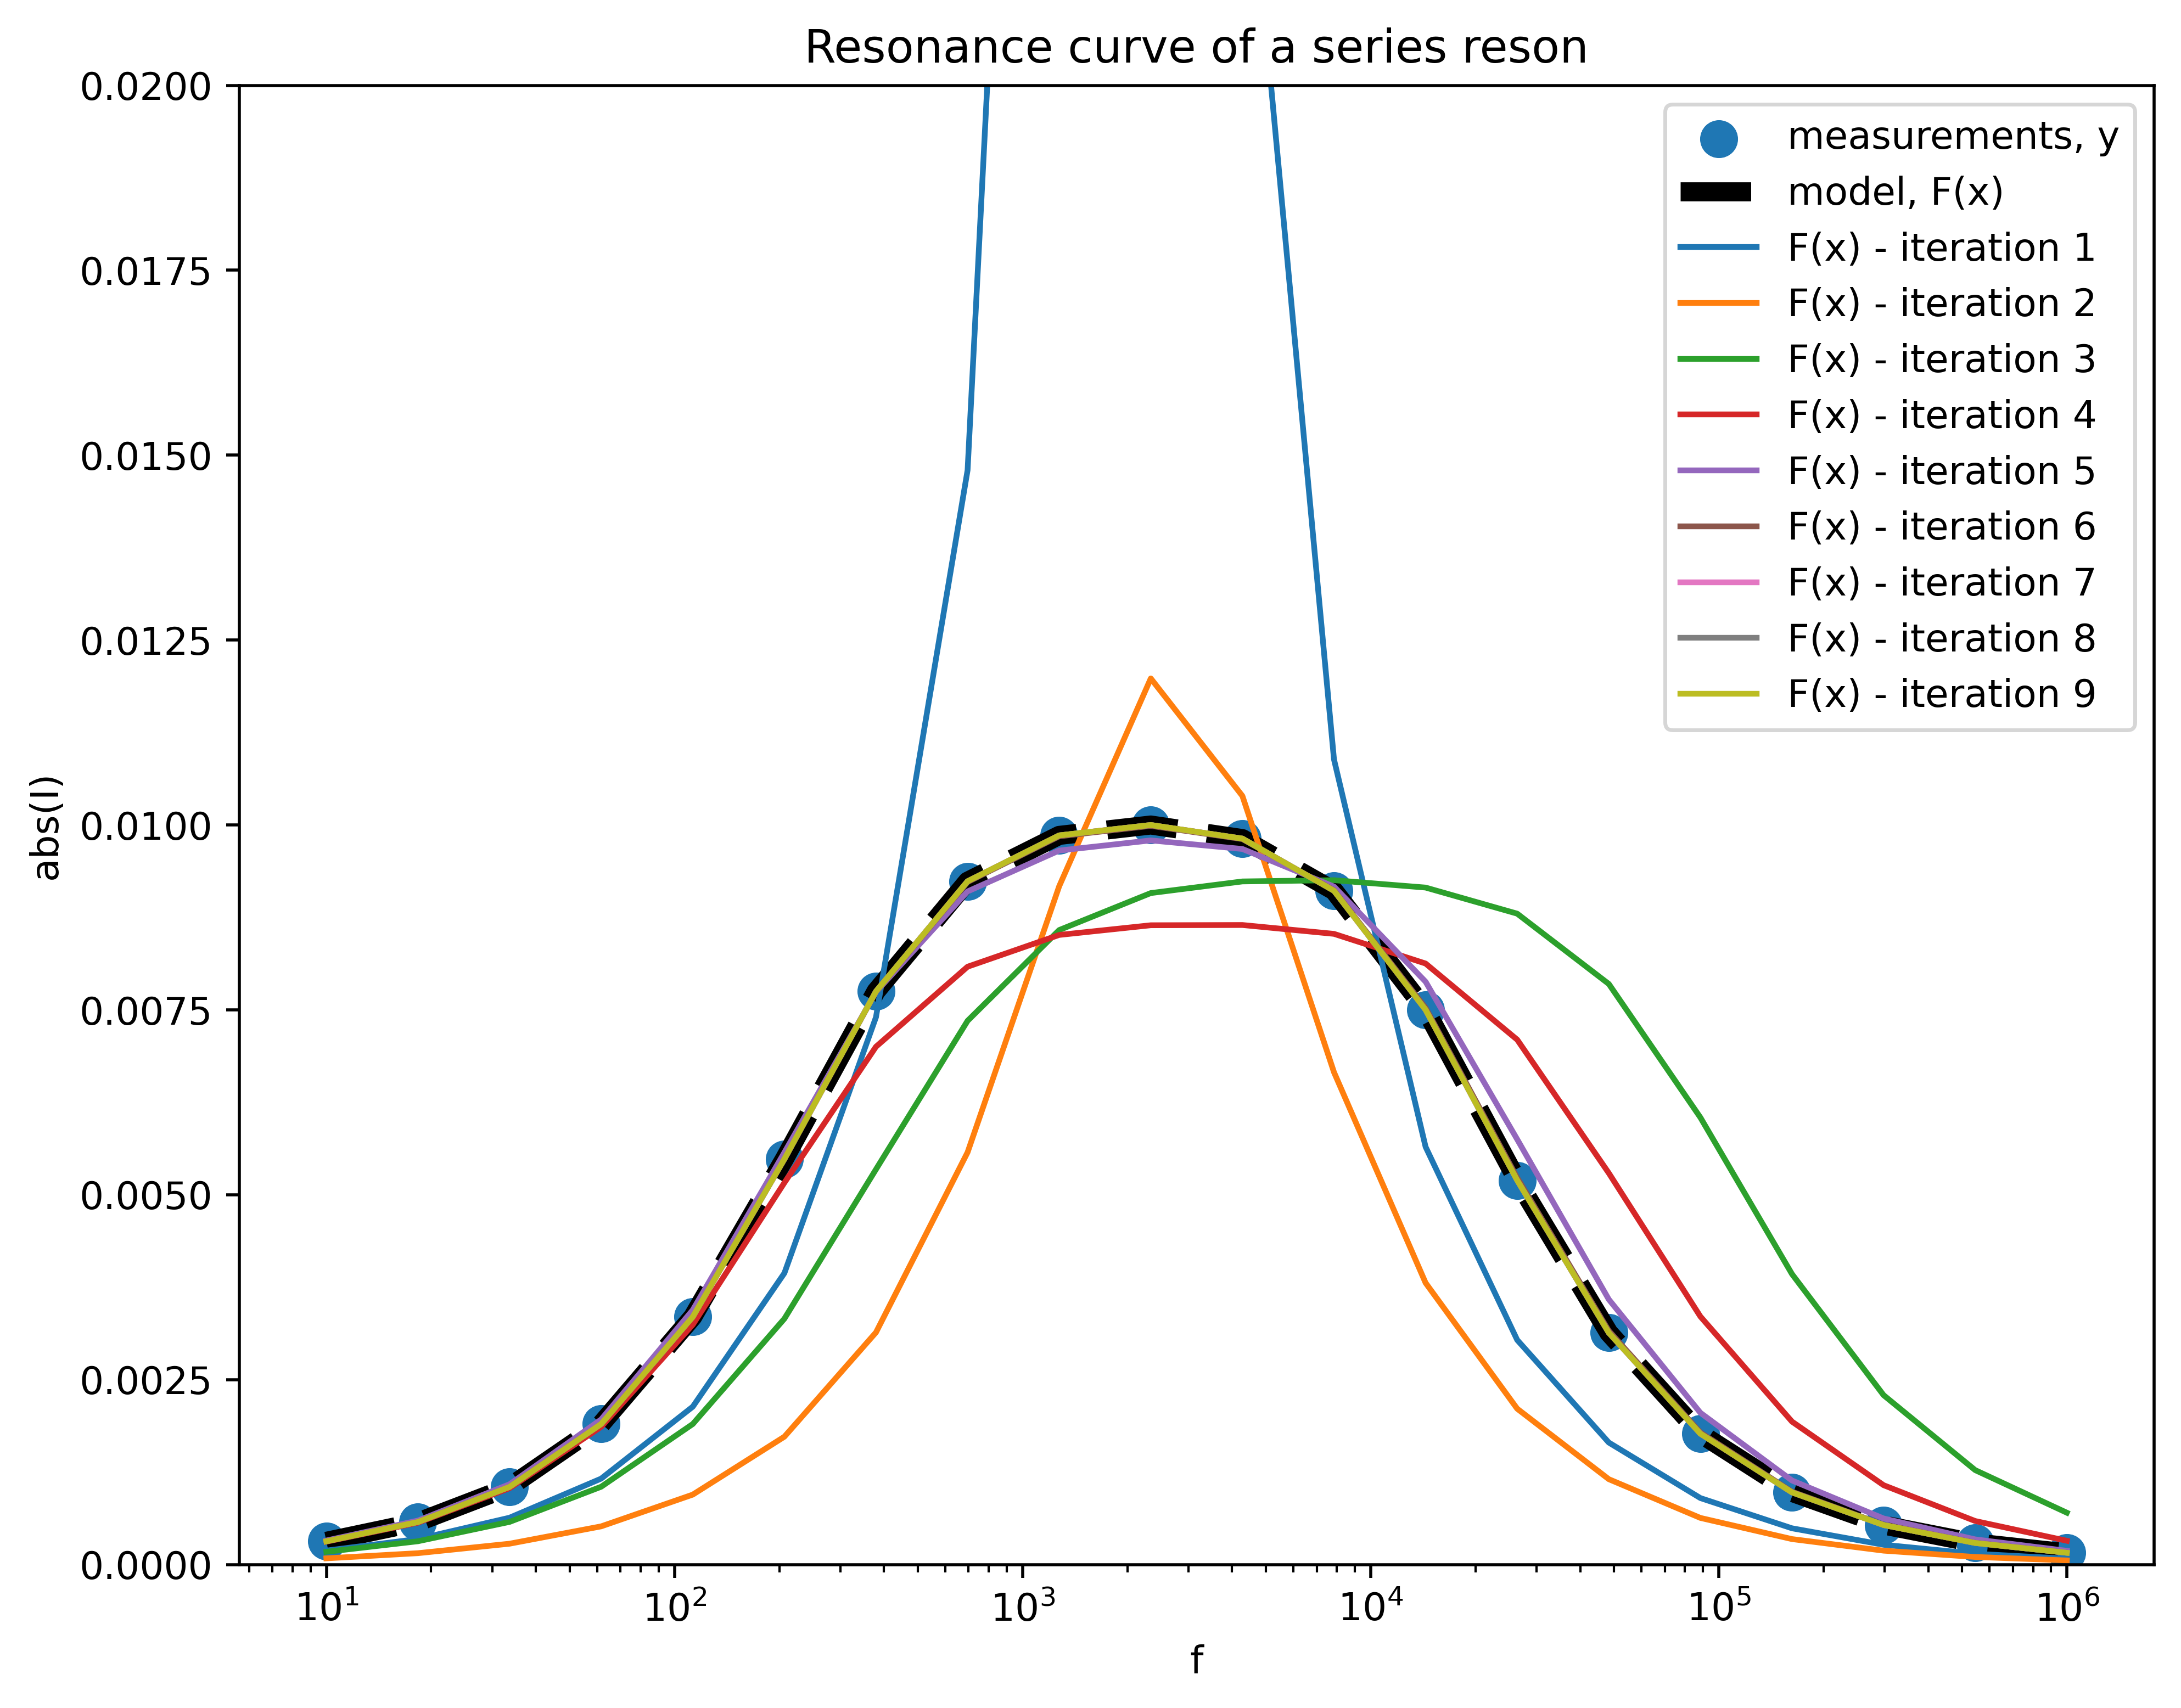

In [3]:
import scipy.io as sio
import matplotlib.pyplot as plt

I = sio.loadmat("I_m.mat")["I_m"].T
f = np.logspace(1, 6, len(I))[:,None]

model = lambda x: np.abs(1/(x[0]+ 1j*((2*np.pi*f)*x[1]-1/((2*np.pi*f)*x[2]))))

x0 = np.array([[0.5],[2e-3],[3e-6]]) # scaled values, R=x(0), L=x(1).10^-3, C=x(2).10^-6
#x0 = np.array([[0.5],[0.2],[0.3]]) # non-scaled values

xs, xsteps, fc= gauss_newton(model, x0, np.abs(I), N_max=1_000, h = 1e-8)

fig, ax = plt.subplots(figsize=((9,7)), dpi = 500)
ax.scatter(f, abs(I),label='measurements, y', s = 80)
ax.set_xscale('log'); plt.xlabel('f');plt.ylabel('abs(I)'); plt.title('Resonance curve of a series reson')
ax.plot(f, model(xsteps[-1]),color="k",label='model, F(x)', linewidth = 5, linestyle = '--')

for i in range(len(xsteps)):
    xstep_i_transposed = xsteps[i]
    ax.plot(f, model(xstep_i_transposed), label=f'F(x) - iteration {i+1}')

ax.legend()
ax.set_ylim(ymax = 0.02, ymin = 0)

print("Starting point at x =", x0)
print("Optimum at x =", xsteps[-1])
print("Forward function calls:",fc)